In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def f(x):
  return 3*x**2 -4*x + 5

In [6]:
f(3)

20

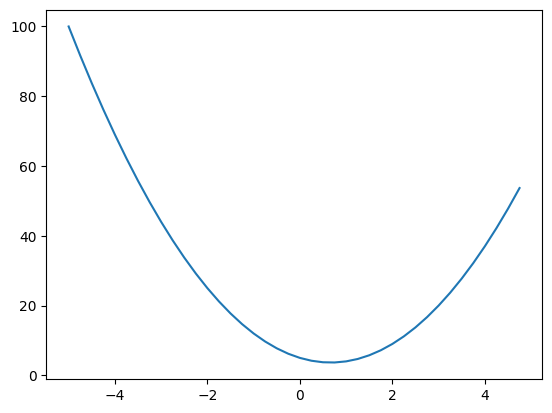

In [8]:
xs = np.arange(-5 , 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.show()


In [9]:
h=0.00000001
x=2/3
(f(x+h)-f(x))/h

0.0

In [10]:
a=3
b=-3
c=21
d =a*b +c
print(d)




12


In [11]:
h=0.0000001

#inputs
a=3
b=-3
c=21
d1 =a*b +c
a=+h
d2=a*b +c
print("d1",d1)
print("d2",d2)
print("slope",(d2-d1)/h)

d1 12
d2 20.9999997
slope 89999997.0


In [85]:
class Value:
  def __init__(self, data,_children=(),_op='', label=''):
    self.data = data
    self._prev = set(_children)
    self._backward=lambda: None
    self._op=_op
    self.label=label
    self.grad=0.0




  def __repr__(self) :
    return f"Value(data={self.data})"

  def __add__(self , other):
    other =other if isinstance (other, Value) else Value (other)
    out=Value(self.data + other.data,(self,other),'+')

    def _backward():
      self.grad+=1.0*out.grad
      other.grad+=1.0*out.grad
    out._backward=_backward
    return out
  
  def __sub__(self,other):
    return self+(-other)
  def __neg__(self):
    return self*-1
 
  def __rmul__ (self ,other):
    return self * other
  
  def __truediv__(self,other):
    return self* other ** -1
 
  def __mul__(self , other):
    other =other if isinstance (other, Value) else Value (other)
    out=Value(self.data * other.data,(self,other),'*')

    def _backward():
      self.grad+=other.data*out.grad
      other.grad+=self.data*out.grad
    out._backward=_backward
    return out
  
  def __pow__(self,other):
    assert isinstance (other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data **other, (self,), f'**{other}')

    def _backward():
      self.grad += other*(self.data**(other-1))*out.grad 
    out._backward = _backward
    return out
 
  def tanh(self):
    x= self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')

    def _backward():
      self.grad+=(1-t**2)*out.grad
    out._backward=_backward
    return out
  
  def exp(self):
    x=self.data
    out =Value(math.exp(x),(self,),'exp')

    def _backward():
      self.grad+=out.data * out.grad
    out._backward=_backward
    return out


  def backward(self):

    topo =[]
    visited=set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad=1.0

    for node in reversed(topo):
      node._backward()


a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b;e.label='e'
d=e+c;d.label='d'
f=Value(-2.0,label='f')
L=d*f ; L.label='L'
L





Value(data=-8.0)

In [65]:
a=Value(2.0, label='a')
b=Value(2.0, label='b')



a*(b**3)

Value(data=16.0)

In [28]:
import os 
os.environ["PATH"] += os.pathsep+'C:/Program Files/Graphviz/bin'

In [29]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f|grad %.4f  }" % (n.label, n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

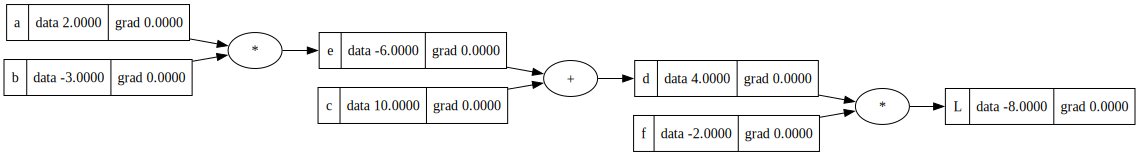

In [30]:
draw_dot(L)

In [93]:
# inputs x1,x2
x1 =Value (2.0, label='x1')
x2 =Value(0.0, label='x2')
#weights w1,w2
w1 =Value (-3.0, label='w1')
w2= Value (1.0, label='w2')
# bias of the neuron
b=Value(6.88137, label='b')
# x1*w1 + x2*w2 + b
x1w1= x1*w1; x1w1. label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*W2'
n = x1w1x2w2 +b; n. label = 'n'
o= n.tanh();o.label='o'


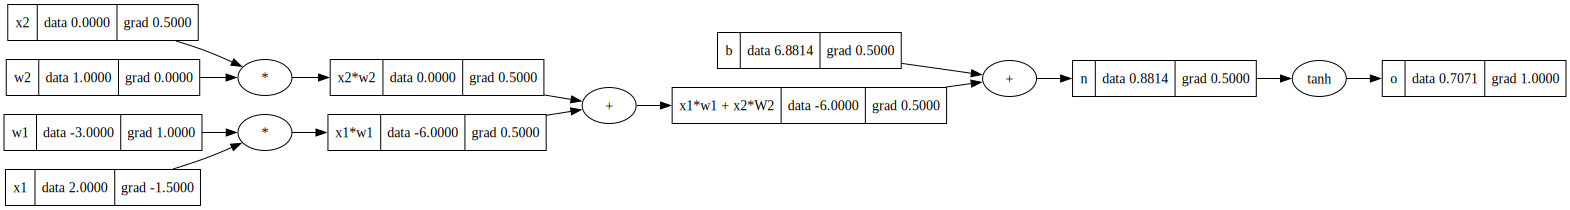

In [94]:

o.backward()
draw_dot(o)

In [89]:
o.backward()

In [75]:
# a= Value  (-2.0,label='a')
# b= Value  (3.0,label='b')
# c=a*b ;c.label='c'
# d=a+b ;d.label='d'
# e=c*d ;e.label='e'
# e.backward()
# draw_dot(e)

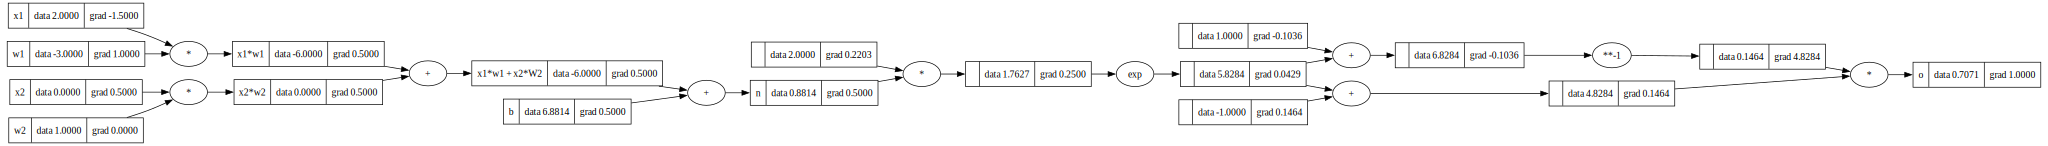

In [95]:
# inputs x1,x2
x1 =Value (2.0, label='x1')
x2 =Value(0.0, label='x2')
#weights w1,w2
w1 =Value (-3.0, label='w1')
w2= Value (1.0, label='w2')
# bias of the neuron
b=Value(6.88137, label='b')
# x1*w1 + x2*w2 + b
x1w1= x1*w1; x1w1. label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*W2'
n = x1w1x2w2 +b; n. label = 'n'
e=(2*n).exp()
o= (e - 1) / (e + 1)
o.label='o'
o.backward()
draw_dot(o)


In [112]:
import torch


In [110]:
x1= torch. Tensor ([2.0]).double() ; x1.requires_grad= True
x2= torch. Tensor( [0.0]).double() ; x2.requires_grad= True
w1= torch. Tensor ([-3.0]).double() ; w1.requires_grad= True
w2= torch. Tensor ([1.0]).double() ; w2.requires_grad= True
b = torch. Tensor( [6.881372]).double() ; b.requires_grad= True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
print(o.data.item())
o.backward()
print('___')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071059751483914
___
x2 0.5000011399094426
w2 0.0
x1 -1.5000034197283278
w1 1.0000022798188852


In [114]:
import random

In [225]:
class Neuron:

    def __init__(self,nin):
        self.w=[Value(random.uniform(-1,1)) for _ in range (nin)]
        self.b=Value(random.uniform(-1,1))

    def __call__(self, x): 
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out=act.tanh()
        return out
    
class Layer:
    def __init__ (self,nin,nout):
        self.neurons=[Neuron(nin) for _ in range (nout)]

    def __call__(self,x):
        #print(self.neurons)
        outs =[n(x) for n in self.neurons]
        return outs [0] if len(outs) ==0 else outs
    
    
class MLP:
    def __init__(self,nin,nouts):
        sz=[nin]+nouts
        self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self,x):
        for layer in self.layers:
            q=layer(x)
        return q 
    

x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)





[Value(data=-0.5732512624978293)]

In [179]:
n(x).backward()

In [226]:
xs = [
[2.0, 3.0, 1.0],
[3.0, -1.0, 0.5],
[0.5, 1.0, 1.0],
[1.0, 1.0, 1.0],
]
ys =[1.0, -1.0, -1.0, 1.0] # desired targets
ypred= [n(x) for x in xs]
ypred

[[Value(data=0.4361126670456528)],
 [Value(data=0.671438665482585)],
 [Value(data=0.07399468902178255)],
 [Value(data=0.24556514363792364)]]